In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set target ID
target_id = 'TIC 283303192'

In [3]:
# Search for TESS FFI data
search_ffi = lk.search_tesscut(target_id)
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 283303192, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

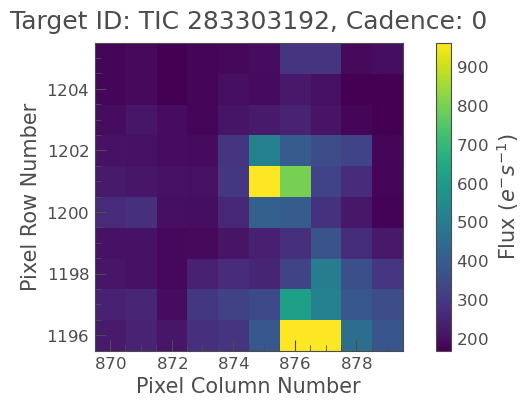

In [4]:
# Plot FFI data
ffi_data.plot()

<AxesSubplot:title={'center':'Target ID: TIC 283303192, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

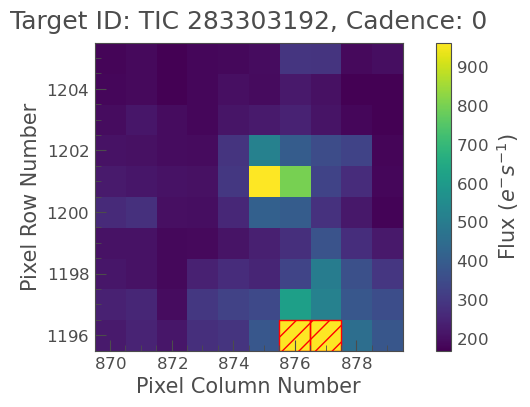

In [5]:
# Define aperture mask for FFI data
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
ffi_data.plot(aperture_mask=target_mask, mask_color='r')

In [6]:
# Convert FFI data to lightcurve using aperture mask
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [7]:
# Search for TESS lightcurve data
search_lcf_refined = lk.search_lightcurve(target_id, author="TESS-SPOC", exptime=600)
lcf = search_lcf_refined.download_all()

Text(0.5, 1.0, 'PDCSAP light curve of TIC 283303192')

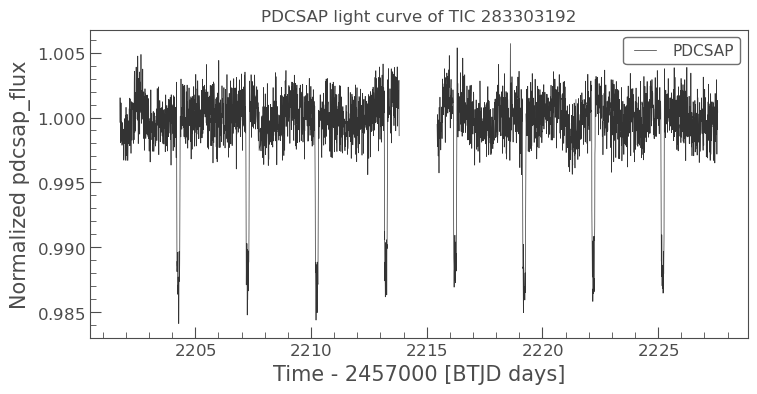

In [8]:
# Plot PDCSAP lightcurve
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP")
ax.set_title("PDCSAP light curve of TIC 283303192")

In [9]:
# Flatten, fold, and bin PDCSAP lightcurve
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=2.986177861778617881)
binned_lc = folded_lc.bin(time_bin_size=0.01)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

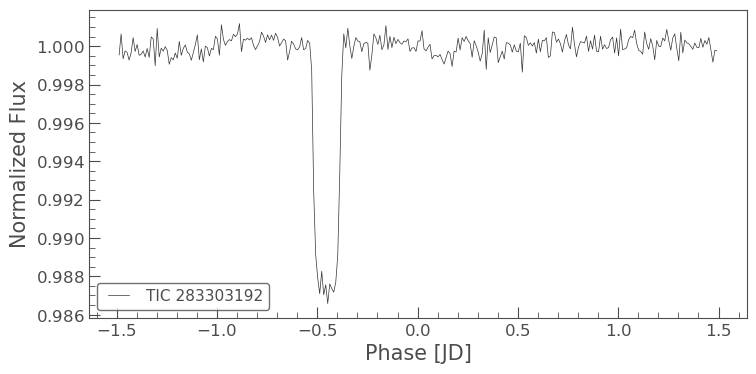

In [10]:
# Plot flattened, folded, and binned PDCSAP lightcurve
lcf[0].flatten(window_length=401).fold(period=2.986177861778617881).bin(time_bin_size=0.01).plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

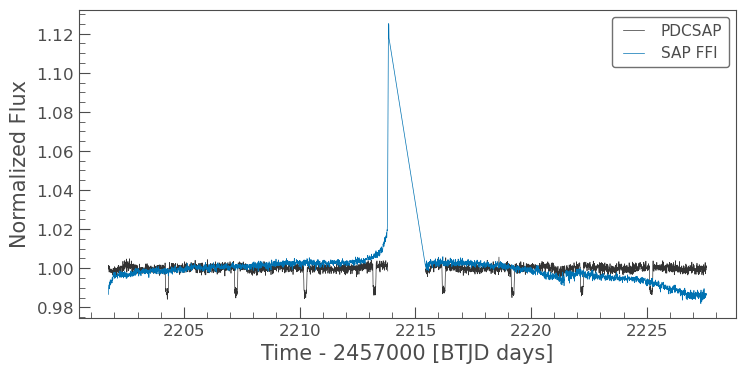

In [11]:
# Plot FFI lightcurve and PDCSAP lightcurve on the same axis
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP")
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [12]:
# Interact with FFI data
ffi_data.interact()
ffi_data.interact_sky()

In [13]:
# Search for all TESS lightcurve data
lcs = lk.search_lightcurve(target_id).download_all()

In [14]:
# Stitch lightcurves and remove outliers
lc = lcs.stitch().remove_outliers()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_flux', 'sap_bkg', 'sap_bkg_err'}
  warnings.warn(


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

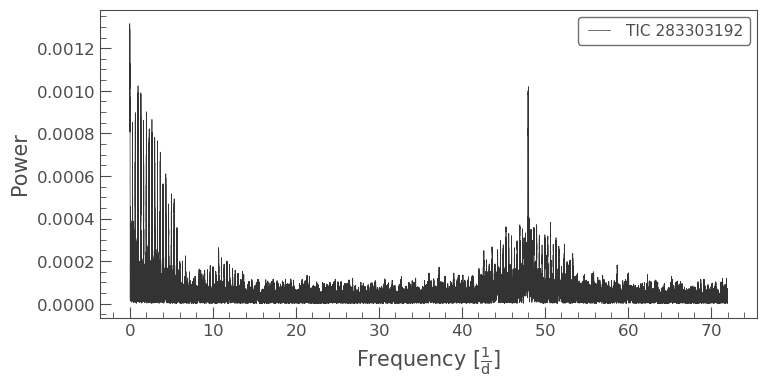

In [15]:
# Plot periodogram of stitched and outlier-removed lightcurve
pg = lc.to_periodogram()
pg.plot()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 283303192, Cadence: 11560'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

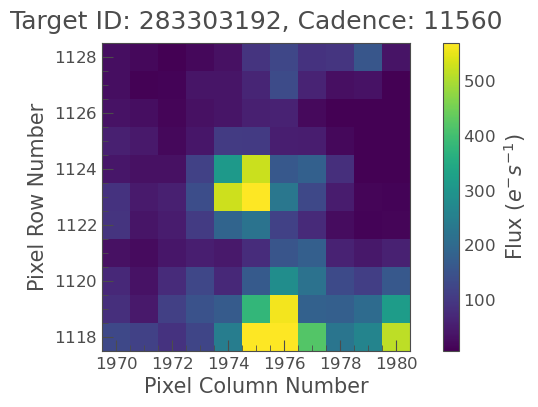

In [16]:
# Plot TESS pixel file
tpf = lk.search_targetpixelfile(target_id).download()
tpf.plot()

<AxesSubplot:title={'center':'Target ID: 283303192, 1468.31 - 1490.04 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

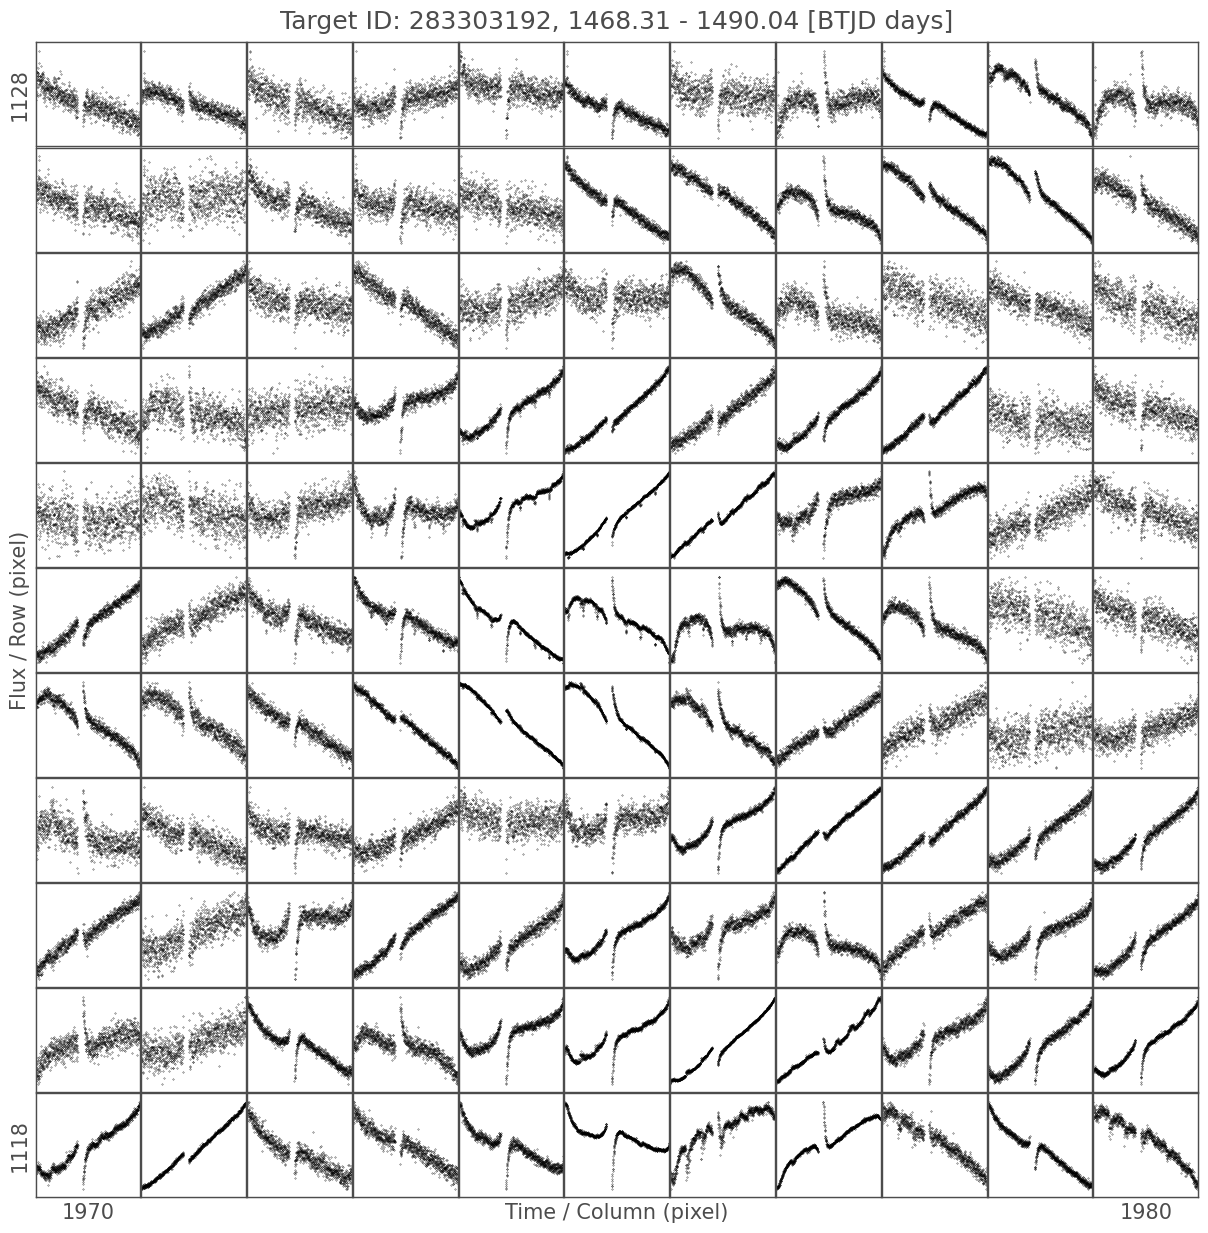

In [17]:
# Plot TESS pixel file pixels
tpf.plot_pixels()

<AxesSubplot:title={'center':'Target ID: 283303192, 1468.31 - 1490.04 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

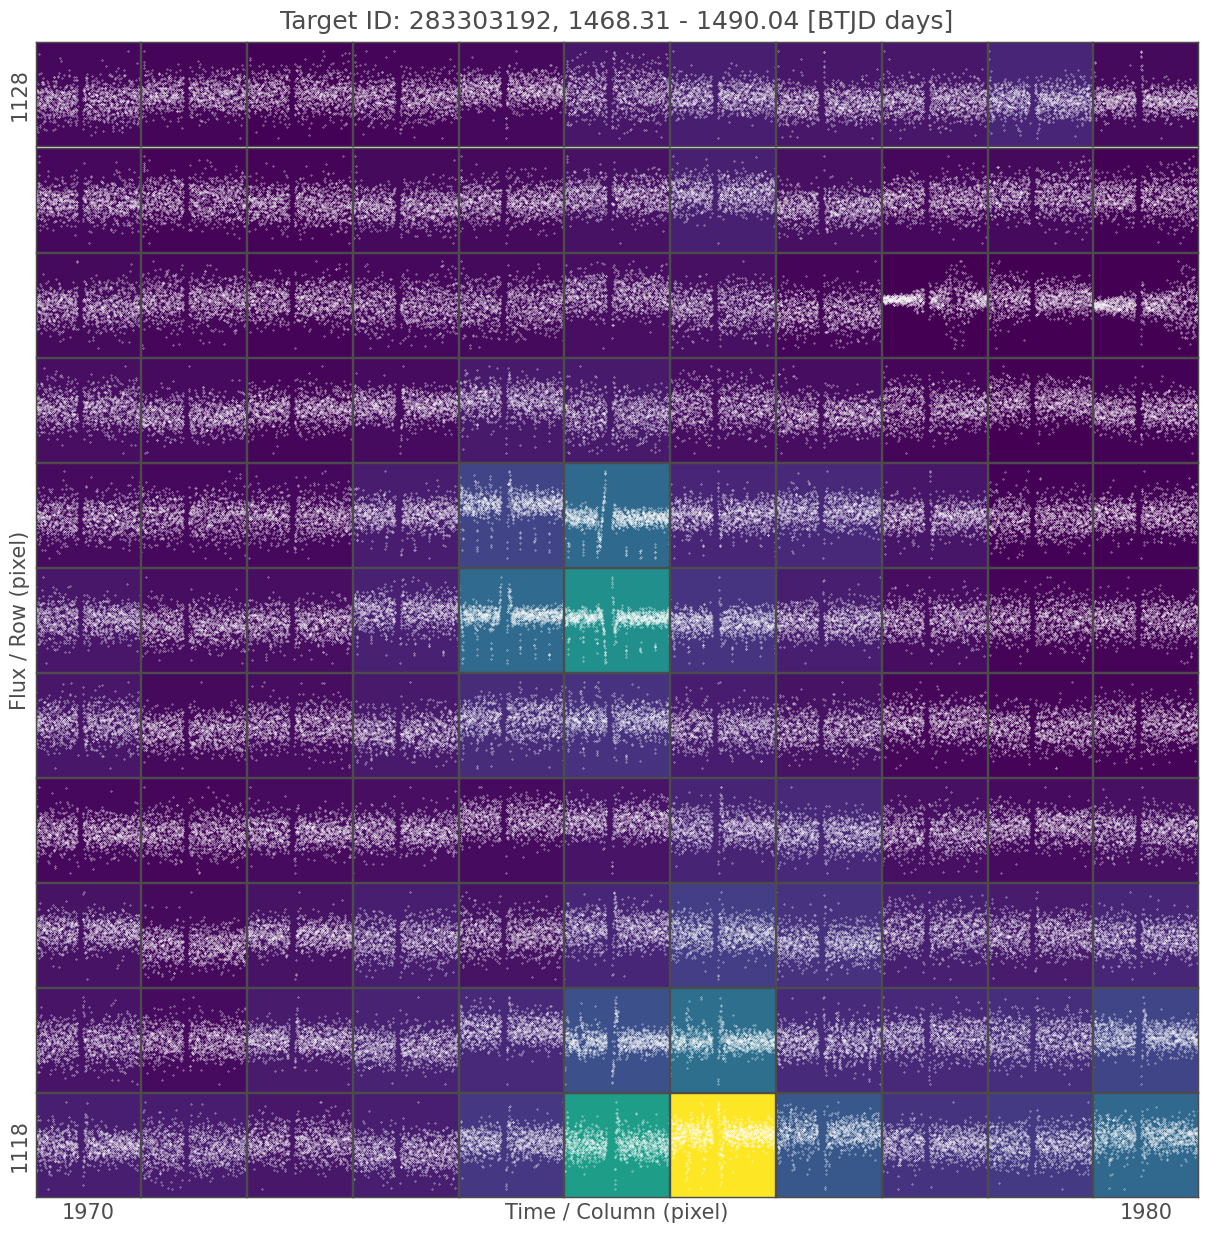

In [18]:
# Plot TESS pixel file pixels with corrected flux and outlier removal
tpf.plot_pixels(corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), show_flux=True)

<AxesSubplot:title={'center':'Target ID: 283303192, 1468.31 - 1490.04 [BTJD days]'}, xlabel='Frequency / Column (pixel)', ylabel='Power / Row (pixel)'>

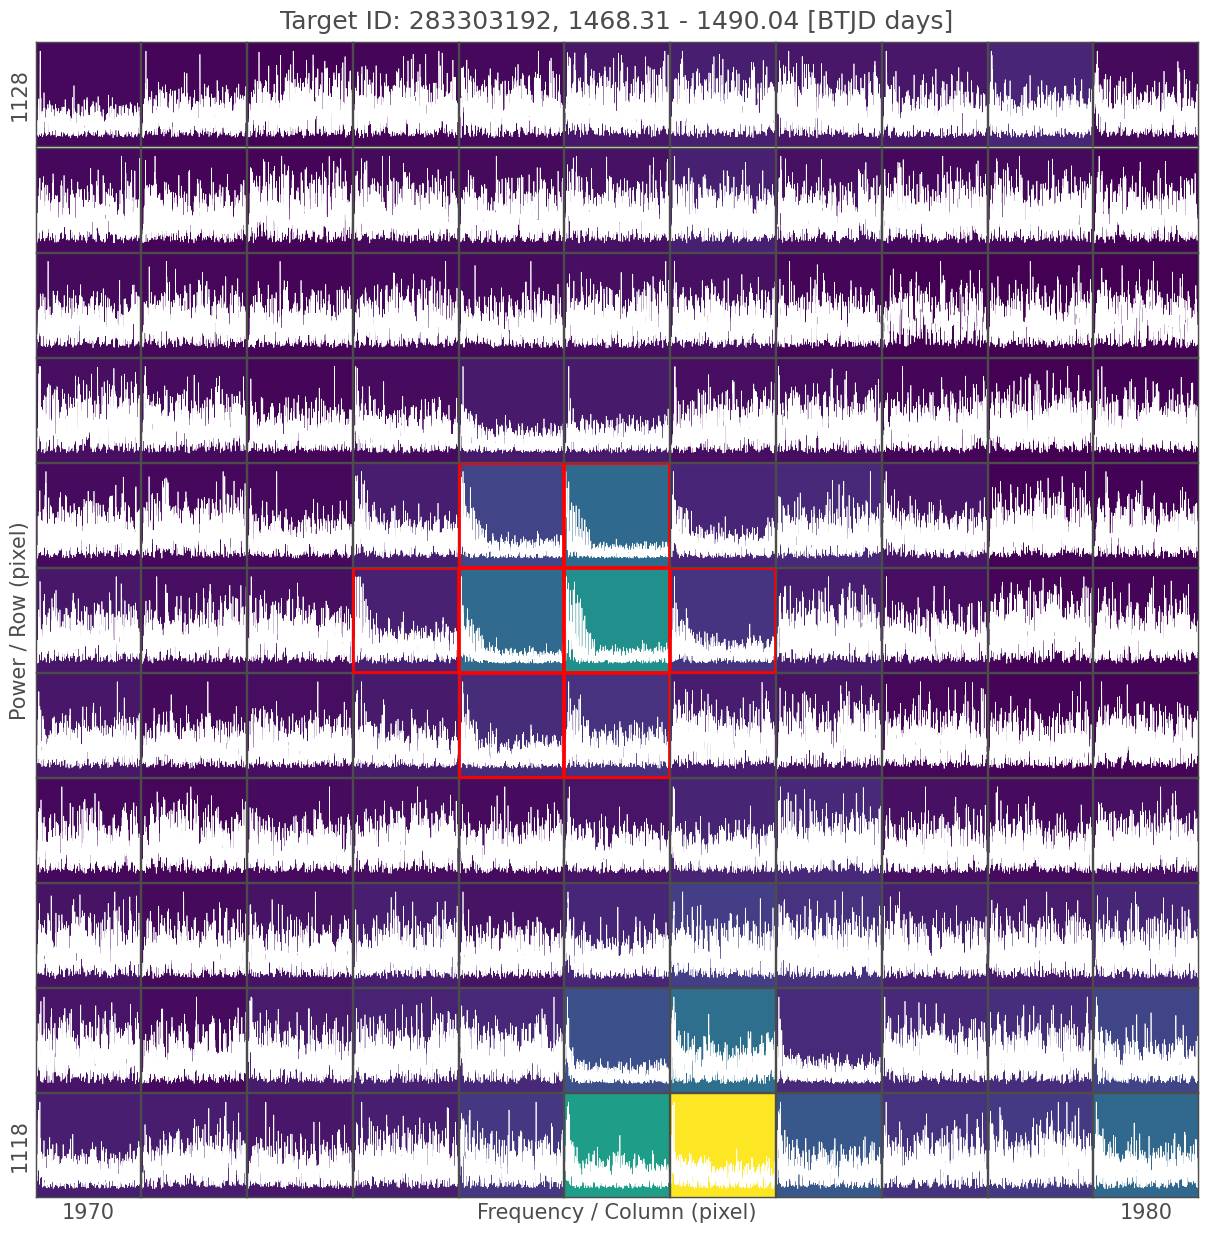

In [19]:
# Plot TESS pixel file pixels with corrected flux, outlier removal, and periodogram
tpf.plot_pixels(corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), periodogram=True, show_flux=True, aperture_mask='pipeline')

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

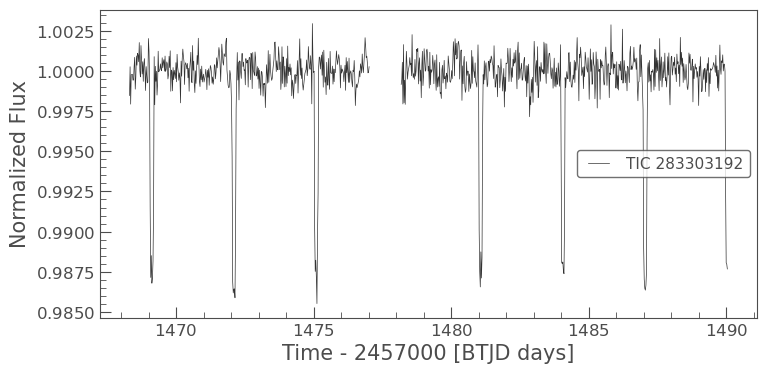

In [20]:
# Search for TESS lightcurve data with hard quality bitmask and flatten it
lc_koi = lk.search_lightcurve(target_id).download(quality_bitmask='hard').flatten()
lc_koi.plot()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 283303192, 1468.31 - 1490.04 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

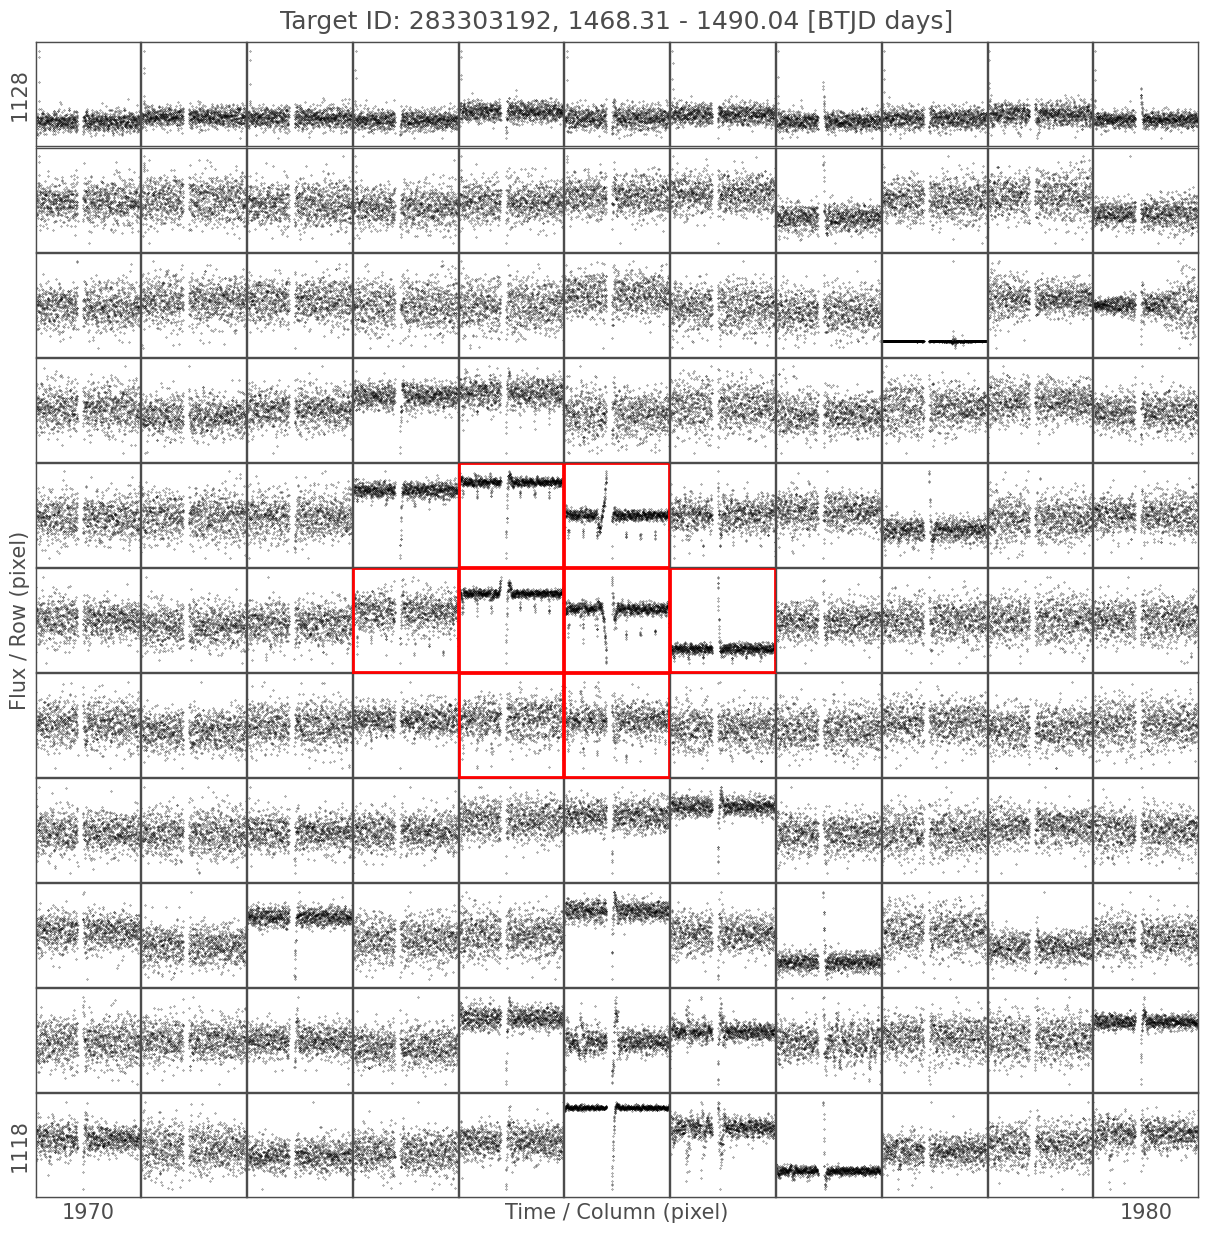

In [21]:
# Plot TESS pixel file pixels with corrected flux and selected aperture mask
tpf_koi = lk.search_targetpixelfile(target_id).download()
tpf_koi.plot_pixels(aperture_mask='pipeline', corrector_func=lambda x: x.remove_nans().flatten())

In [22]:
# Plot contaminated TESS lightcurve data
lc_contam = lk.search_lightcurve(target_id).download()
lc

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<TessLightCurve length=10786 LABEL="TIC 283303192" SECTOR=33 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time             flux         flux_err    cadenceno      quality     
                                                                            
       Time           float64        float64       int32         int32      
------------------ -------------- -------------- ---------- ----------------
1468.3075090754332  9.9925756e-01  8.1469631e-04      11560                0
1468.3283431545194  1.0010459e+00  8.1565196e-04      11561                0
1468.3491772326736  9.9871999e-01  8.1509881e-04      11562                0
1468.3700113094312  1.0005485e+00  8.1532891e-04      11563                0
 1468.411679460153  1.0005789e+00  8.1503438e-04      11565                0
1468.4325135341173  1.0002135e+00  8.1482629e-04      11566                0
1468.4533476066833  1.0002156e+00  8.1497018e-04      11567                0
1468.4741816783182  1.0010659e+00  8.1473449e-04      11568                0
1468.4950157490232  1.0016319e+00  8.1494864e-04      11569                0
               ...            ...            ...        ...              ...
 2227.508906552167  1.0030006e+00  1.7385611e-03     144006    1000000000000
2227.5158508691284  1.0001923e+00  1.7385611e-03     144007    1000000000000
2227.5227951860907  1.0012180e+00  1.7385611e-03     144008    1000000000000
2227.5297395030534  1.0011551e+00  1.7385611e-03     144009    1000000000000
2227.5366838200152  9.9723893e-01  1.7385611e-03     144010    1000000000000
2227.5436281369794  1.0001891e+00  1.7385611e-03     144011    1000000000000
  2227.55057245346  1.0001543e+00  1.7385611e-03     144012    1000000000000
2227.5575167695115  9.9967933e-01  1.7385611e-03     144013    1000000000000
 2227.564461085565  1.0015994e+00  1.7385611e-03     144014    1000000000000
 2227.571405401619  1.0028542e+00  1.7385611e-03     144015    1000000000000

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "


In [ ]:
lk.show_citation_instructions()